In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_context('talk')
np.set_printoptions(suppress=True) 
    ### not xEyy format(science float format)
%matplotlib inline  

In [2]:
import scipy.io
data = scipy.io.loadmat('ex8data1.mat')
print data.keys()

['yval', '__header__', '__globals__', 'Xval', 'X', '__version__']


In [3]:
X = data['X']
Xval = data['Xval']
yval = data['yval']

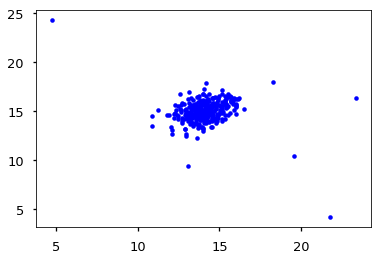

In [4]:
plt.plot(X[:, 0], X[:, 1], 'b.');
# plt.scatter(X[:, 0], X[:, 1], marker='.');

In [5]:
def estimateGassian(X):
    m, n = X.shape
    mu = X.mean(axis=0).reshape(1,-1)
    sigma2 = 1.0/m * np.sum((X-mu)**2, axis=0).reshape(1,-1)
    return mu, sigma2

In [6]:
mu, sigma2 = estimateGassian(X)
print mu             ### 14.112, 14.998
print sigma2         ### 1.8326, 1.7097

[[14.11222578 14.99771051]]
[[1.83263141 1.70974533]]


$$p(x;\mu,\sigma^2)=
\frac{1}{\sqrt{2\pi\sigma^2}}
e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

$$p(x)=
\frac{1}{ (2\pi)^{\frac{n}{2}} |\Sigma|^{1/2}}
exp(-(1/2) (x-\mu)^T \Sigma^{-1} (x-\mu) )
$$

In [7]:
def multivariateGaussian(X, mu, Sigma2):
    k = mu.shape[1]

    if Sigma2.shape[0] == 1 or Sigma2.shape[1]==1:
        Sigma2 = Sigma2.flatten()
        Sigma2 = np.diag(Sigma2)

    X =  X - mu
    p1 = np.linalg.det(Sigma2)**(-0.5)
    p2 = np.dot(X, np.linalg.pinv(Sigma2))
    p3 = np.sum(p2*X, axis=1)
    p4 = np.exp(-0.5*p3).reshape(-1,1)
#     print p1
#     print k
#     print (2.0*np.pi) ** (-k/2.0)
#     print ((2.0*np.pi) ** (-k/2.0) * p1)
    p = ((2.0*np.pi) ** (-k/2.0) * p1) * p4
    return p.reshape(-1,1)

In [8]:
p = multivariateGaussian(X, mu, sigma2.reshape(1,-1))
print p[:5]
### 0.064708
### 0.050304
### 0.072450
### 0.050316
### 0.063685

[[0.06470829]
 [0.05030417]
 [0.07245035]
 [0.05031575]
 [0.06368497]]


In [9]:
def visualizeFit(X, mu, sigma2):
    plt.plot(X[:, 0], X[:, 1], 'b.');
    X1 = np.arange(0, 35, 0.5)
    X2 = np.arange(0, 35, 0.5)
    XX = np.zeros([len(X1)*len(X2), 2])
    for i in xrange(len(X1)):
        for j in xrange(len(X2)):
            XX[i*len(X2)+j] = np.array([X1[i], X2[j]])
    Z = multivariateGaussian(XX, mu, sigma2)
    Z = Z.reshape(len(X1), -1)
    plt.contour(X1, X2, Z, 10**np.arange(-20.,0.,3.),
                colors='r', linewidths=1);

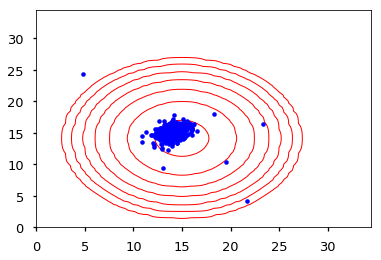

In [10]:
visualizeFit(X, mu, sigma2);

In [11]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [12]:
#####################################################
##
## Part3, Find Outliers
##

def selectThreshold(yval, pval):
    bestEpsilon = 0.
    bestF1 = 0.;
    stepsize = (np.max(pval) - np.min(pval))/1000
    for epsilon in np.arange(np.min(pval), 
                             np.max(pval)+stepsize, stepsize):
        pred = (pval<epsilon).astype('int')
        tp = np.sum((yval[pred==1]==1).astype('int'))
        fp = np.sum((yval[pred==1]==0).astype('int'))
        fn = np.sum((yval[pred==0]==1).astype('int'))
        if (tp+fp) == 0:
            prec = 0.0
        else:
            prec = tp*1.0/(tp+fp)
        if (tp+fn) == 0:
            rec = 0.0
        else:
            rec  = tp*1.0/(tp+fn)
        if (prec+rec) == 0:
            F1 = 0.0
        else:
            F1 = 2*prec*rec /(prec+rec)
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon
    return bestEpsilon, bestF1

In [13]:
pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = selectThreshold(yval, pval)
print '%e'%epsilon   ### 8.99e-05
print F1             ### 0.875000

8.990853e-05
0.8750000000000001


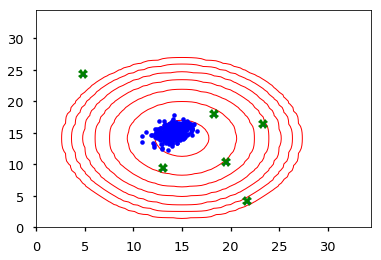

In [22]:
outliers = np.where(p < epsilon)[0]
visualizeFit(X, mu, sigma2);
plt.plot(X[outliers,0], X[outliers, 1], 'gX');

In [17]:
outliers

array([300, 301, 303, 304, 305, 306], dtype=int64)

In [24]:
import scipy.io
data = scipy.io.loadmat('ex8data2.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval']

In [26]:
mu, sigma2 = estimateGassian(X)
p = multivariateGaussian(X, mu, sigma2)
pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = selectThreshold(yval, pval)
print epsilon                              ### 1.38e-18
print F1                                   ### 0.615385
print np.sum((p<epsilon).astype('int'))    ### 117

1.377228890761358e-18
0.6153846153846154
117
